## Dibujar diagramas de Bode con Sympy

### Presentación

Durante los últimos años he aprendido mucho gracias a Pybonacci y he pensado que estaría bien devolver un poco a la comunidad. No sé que valor pueden tener mis contribuciones ya que, la verdad, no sé mucho. Básicamente quiero escribir sobre las tareas que hago con Python, que no suelen ser muy complicadas. Mi problema es que me peleo para lograr hacer algo y, luego, se me olvida. Me paso repitiendo los mismos procesos de aprendizaje cada 6 meses. Así que me he decidido a escribirlos, si además le sirven a alguien ¡perfecto!

Los artículos serán nivel _iniciación_, ya que es el mío. Entre la media docena de programas que he escrito y uso con regularidad, creo que solo una vez he utilizado una clase. No hago cosas complicadas.

Entre los artículos que quiero escribir próximamente hay algunos relacionados con [control de procesos](https://es.m.wikipedia.org/wiki/Sistema_de_control) o uso de [unidades con Python](https://pint.readthedocs.io/en/stable/).

Bueno, ya está bien de rollo, al lío...

### ¿Qué vamos a hacer?


Los [diagramas de Bode](https://es.m.wikipedia.org/wiki/Diagrama_de_Bode) se pueden utilizar para analizar la estabilidad de [lazos de control por retroalimentación](https://es.m.wikipedia.org/wiki/Realimentación). Vamos a ver con detalle el proceso para dibujar los diagramas, el conocimiento de Python o de Sympy que se requiere es minimo.

Dibujar el diagrama de Bode con Sympy es supersimple y es una tarea apta para no programadores, son 6 líneas y las 5 últimas son siempre las mismas. Empezaremos con una breve introducción teórica de esas que si sabes del tema, te puedes saltar, y si no sabes, no te sirve para mucho. Es más bien un recordatorio.

### Un poco de teoría

En este tipo de gráficos se representa la respuesta de proceso, representado por una [función de transferencia](https://es.m.wikipedia.org/wiki/Función_de_transferencia), $G(s)$, respecto a una entrada sinusoidal de frecuencia angular $\omega$. Los diagramas de Bode se utilizan para estudiar la estabilidad de los lazos de control, clave para mejorar el rendimiento de los controladores y evitar accidentes.

El diagrama de Bode se compone de dos gráficos, en el primero se representa la razón de amplitudes, $RA(\omega)$, frente a la frecuencia angular de la entrada. Ambos ejes son logarítmicos. En el segundo de los gráficos se representa el desfase $\varphi(\omega)$ de la salida respecto a la entrada en una escala lineal frente a $\omega$ en una escala logarítmica.

Para calcular la razón de amplitudes y el desfase, solo hay que sustituir $s$ por $i \omega$ en la función de transferencia. El módulo de $G(i \omega)$ es la razón de amplitudes y el argumento es el desfase. Es decir:

$$G(s) \Rightarrow G(i \omega)\\
RA(\omega) = \sqrt{\mathrm{Re}(G(i \omega)^2 + \mathrm{Im}(i \omega)^2} =  \mathrm{abs}(G(i \omega))\\
\varphi(\omega) = \arctan \left (\frac{\mathrm{Im}(G(i \omega)}{\mathrm{Re}(G(i \omega)}
\right ) = \arg(G(i \omega))$$

Con frecuencia se representan estos diagramas realizando aproximaciones o mediante el uso de métodos numéricos. Vamos a ver que su representación utilizando las soluciones analíticas es muy sencilla utilizando Sympy.

### ¡A dibujar!

Veamos un caso sencillo:

$$G(s) = \frac{2}{4 s^2 + 2 s + 1}$$

En primer lugar, cargaremos Sympy:

In [1]:
from sympy import (
    init_printing, symbols, arg, I, plot, pi, lambdify, Heaviside, exp
)
init_printing()

La primera instrucción carga las funciones de la librería de cálculo simbólico que vamos a necesitar. La segunda hace que la representación de los resultados quede más bonita y legible.

A continuación, vamos a definir las variables que utilizaremos con Sympy. Esto es un poco engorroso, pero tiene sus ventajas cuando usamos el alfabeto griego. Definiremos dos variables, $s$, que es un número complejo y $\omega$, que es un número real:

In [2]:
s = symbols("s")
w = symbols("omega", real=True)

Para que sea más cómodo escribir $\omega$, la he definido como *w*, que es más fácil de escribir. Veamos que pasa cuando escribo, _w_:

In [3]:
w

Obtenemos la letra griega $\omega$, es realmente cómodo.

Vamos a definir la función de transferencia:

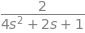

In [4]:
G = 2/(4*s**2 + 2*s +1)
G

A continuación tenemos que sustituir $s$ por $i \omega$, llamo a la nueva ecuación _Gw_. En Sympy, el número complejo $i$ se escribe con una i mayúscula:

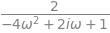

In [5]:
Gw = G.subs(s, I*w)
Gw

Ya solo tenemos que calcular la razón de amplitudes y el desfase:

In [6]:
RA = abs(Gw)
phi = arg(Gw)

Ya solo queda dibujar los dos gráficos. Empezaremos por el gráfico de la razón de amplitudes para valores de $\omega$ entre 0.01 y 100. Como se ve las escalas son logarítmicas:

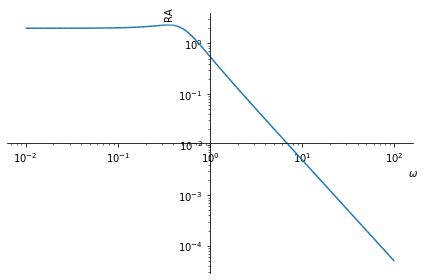

In [7]:
plot(RA, (w, 0.01, 100), xscale="log", yscale="log",
     ylabel="RA", xlabel="$\omega$")

Y el gráfico del desfase, que solo tiene el eje horizontal logarítmico:

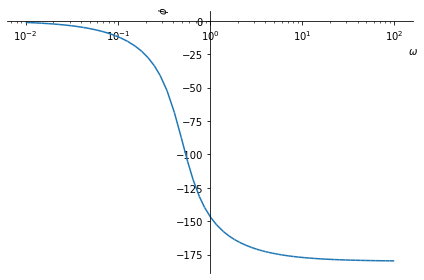

In [8]:
plot(phi*180/pi, (w, 0.01, 100), xscale="log", 
     xlabel="$\omega$", ylabel="$\phi$")

### Otro ejemplo

Veamos un caso más complejo, para comprobar que todo funciona:

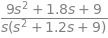

In [9]:
G2 = 9*(s**2 + 0.2*s + 1)/(s*(s**2 + 1.2*s + 9))
G2

Hacemos el cambio de $s$ a $i \omega$:

In [10]:
Gw2 = G2.subs(s, I*w)

Calculamos la razón de amplitudes y el desfase:

In [11]:
RA2 = abs(Gw2)
phi2 = arg(Gw2)

Finalmente, representamos el diagrama de Bode para valores de frecuencia angular entre 0.1 y 10. Para que sea más cómodo explorar el diagrama crearemos dos variables _wmin_ y _wmax_ para el valor mínimo y máximo de frecuencia angular:

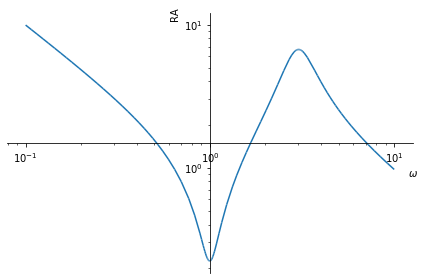

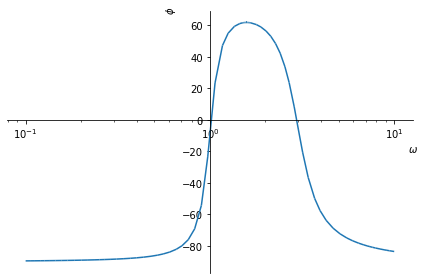

In [12]:
wmin = 0.1
wmax = 10
plot(RA2, (w, wmin, wmax), xscale="log", yscale="log", 
     ylabel="RA", xlabel="$\omega$")
plot(phi2*180/pi, (w, wmin, wmax), xscale="log", 
     xlabel="$\omega$", ylabel="$\phi$")

Podéis comprobar WolframAlpha para comprobar que el resultado es correcto:

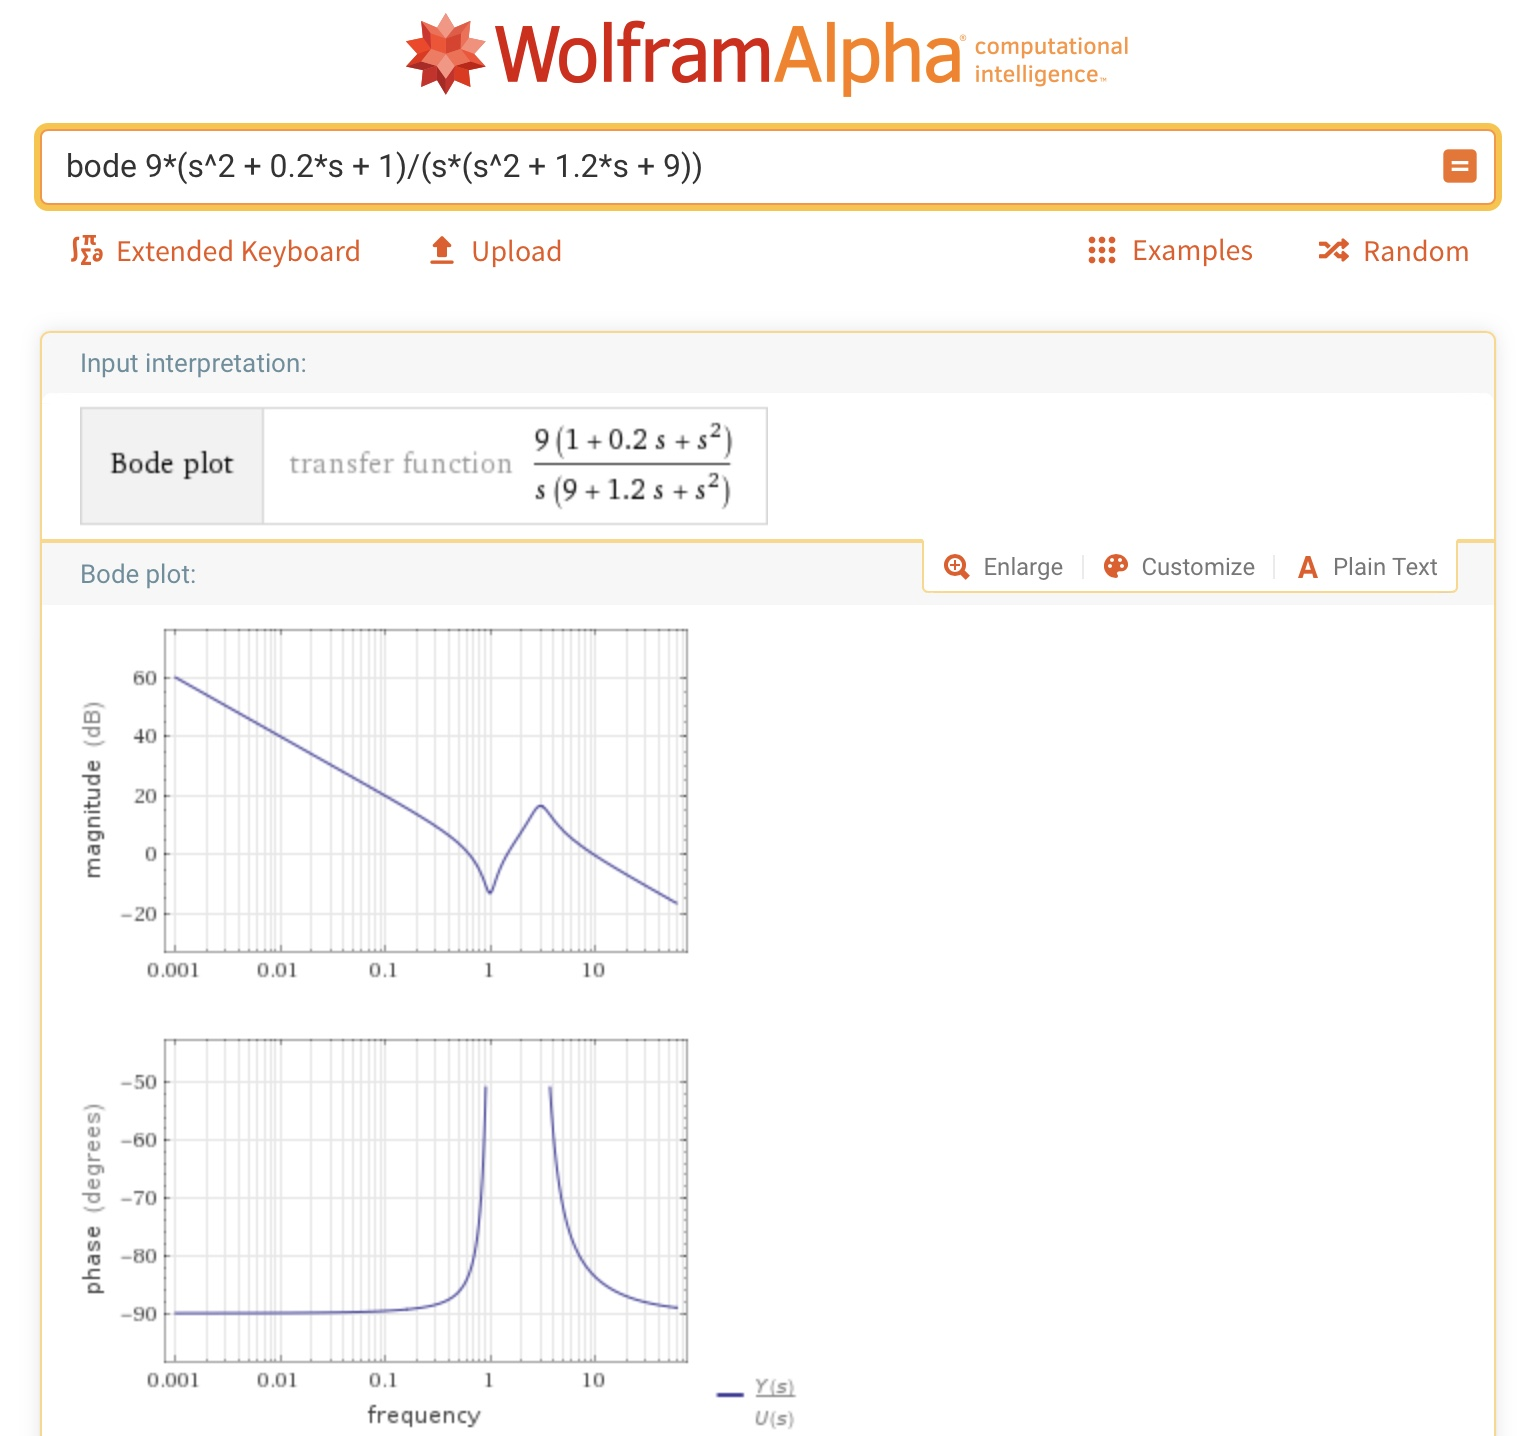

### ¿Todo bien?

Parece que ya tenemos todo listo para poder dibujar de una manera sencilla los diagramas de Bode. Veamos un último ejemplo:

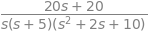

In [13]:
G3 = 20*(s+1)/(s*(s+5)*(s**2+2*s+10))
G3

Se trata de una función de transfencia más compleja. Como los pasos ya están claros, los vamos a ejecutar en un solo paso:

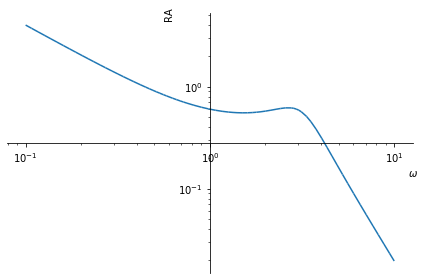

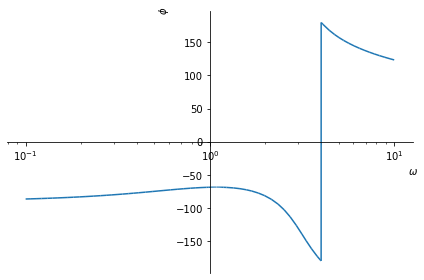

In [14]:
Gw3 = G3.subs(s, I*w)
RA3 = abs(Gw3)
phi3 = arg(Gw3)
wmin = 0.1
wmax = 10
plot(RA3, (w, wmin, wmax), xscale="log", yscale="log",
     ylabel="RA", xlabel="$\omega$")
plot(phi3*180/pi, (w, wmin, wmax),
     xscale="log", xlabel="$\omega$", ylabel="$\phi$")

¡Horror! ¿Qué ha pasado con el gráfico del desfase, $\phi$?

El problema es que el arcotangente va de $-\pi$ a $\pi$. La discontinuidad es debida a que hemos dado una vuelta completa. De alguna manera tenemos que contar las vueltas, para tenerlas en cuenta.

Para eso deberemos encontrar los puntos en los que el desfase toma un valor de $-\pi$. Además tenemos el problema que podemos tener más de una solución en el intervalo de frecuencias que queremos representar.

¿Qué hace uno en esta situación? Pues lo que hace cualquier programador competente... buscar en Stack Overflow: [Python: Finding multiple roots of nonlinear equation](https://stackoverflow.com/questions/13054758/python-finding-multiple-roots-of-nonlinear-equation#13055843).

Tras un copiar+pegar y cambiar cuatro líneas:

In [15]:
# Algoritmo de
# https://stackoverflow.com/questions/13054758/python-finding-multiple-roots-of-nonlinear-equation#13055843
# usuario: halex

import math

def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while f1*f2 > 0.0:
        if x1 >= b:
            return None,None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    return x1,x2

def bisect(f,x1,x2,switch=0,epsilon=1.0e-9):
    f1 = f(x1)
    if f1 == 0.0:
        return x1
    f2 = f(x2)
    if f2 == 0.0:
        return x2
    if f1*f2 > 0.0:
        print('Root is not bracketed')
        return None
    n = int(math.ceil(math.log(abs(x2 - x1)/epsilon)/math.log(2.0)))
    for i in range(n):
        x3 = 0.5*(x1 + x2); f3 = f(x3)
        if (switch == 1) and (abs(f3) >abs(f1)) and (abs(f3) > abs(f2)):
            return None
        if f3 == 0.0:
            return x3
        if f2*f3 < 0.0:
            x1 = x3
            f1 = f3
        else:
            x2 =x3
            f2 = f3
    return (x1 + x2)/2.0

def roots(f, a, b, eps=1e-6):
    #print ('The roots on the interval [%f, %f] are:' % (a,b))
    x = []
    while 1:
        x1,x2 = rootsearch(f,a,b,eps)
        if x1 != None:
            a = x2
            root = bisect(f,x1,x2,1)
            if root != None:
                pass
                x.append(round(root,-int(math.log(eps, 10))))
        else:
            #print ('\nDone')
            #break
            return x

Debemos encontrar en qué valores de $\omega$ hacen que el desfase valga $-\pi$. Realmente tiende a $-\pi$, por lo que va a ser mejor buscar los valores de frecuencia angular que tomen un valor muy cercano a $-\pi$. La ecuación que queremos resolver es:

$$\phi_3 + \pi \cdot 0.9999 = 0$$

Sympy no se encuentra especialmente cómodo realizando cálculos numéricos, algo que no es extraño en los sistemas de cálculo simbólico. Para resolver el problema vamos a definir una función a partir de una expresión de Sympy que funcione bien con cálculos numéricos, para eso utilizaremos la función _lambdify_ que hace esa transformación:

In [16]:
f = lambdify(w, phi3+pi*0.9999)

Vamos a comprobar que funciona calculando el valor de la función que hemos creado para $\omega=2$:

In [17]:
f(2)

Buscamos las raíces entre 1 y 10, ya que sabemos que la raíz se encuentra en esta zona:

In [18]:
vueltas = roots(f, 1, 10, 1e-4)
vueltas

El algoritmo nos permite fijar la precisión. Por defecto se toma un valor de $10^{-6}$, pero realmente con un valor de $10^{-4}$ ya es suficiente y se ahorra mucho tiempo en los cálculos. En el ordenador que estoy escribiendo esto:

eps | tiempo
----|--------
1e-6| 42.2 s
1e-5| 3.8 s
1e-4| 0.4 s

Ya sabemos en que punto hemos dado una vuelta completa, en $\omega = 4.013$. Ahora tenemos que añadir la vuelta al desfase.

Antes vamos a representar nuestro contador de vueltas utilizando la función escalón unidad, _Heaviside_ en sympy. Simplemente dibujamos un escalón de altura unidad desplazándolo el valor del punto en el que tenemos una vuelta completa. Ponemos _vueltas[0]_ en lugar de solo _vueltas_ porque es el primer elemento de la lista.

Cuando tengamos varias vueltas veremos la ventaja de tener una lista:

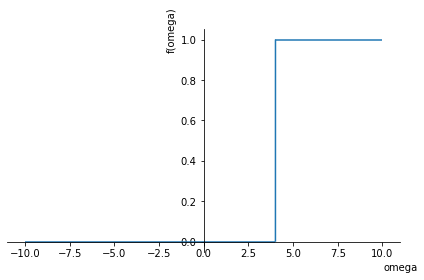

In [19]:
plot(Heaviside(w-vueltas[0]))

Tendremos que restar al desfase, $\phi$, el valor de una vuelta, es decir $2 pi$ radianes a partir de $\omega = 4.013$:

In [20]:
phi3ajustado = phi3 -2*pi*Heaviside(w-vueltas[0])

Ya podemos representar el diagrama de Bode del desfase correcto:

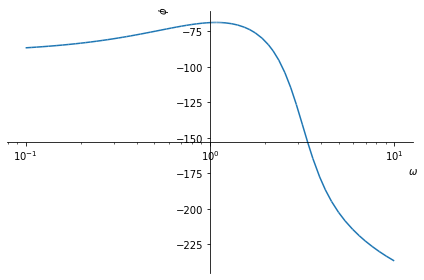

In [21]:
plot(phi3ajustado*180/pi, (w, .1, 10), xscale="log", 
     xlabel = "$\omega$", ylabel = "$\phi$")

### Retrasos

Ya para acabar, que esto se está haciendo largo, vamos a ver qué pasa cuando añadimos un retraso a nuestra función de transferencia. Los retrasos son una función no lineal y que pueden dar bastantes quebraderos de cabeza cuando aparecen.

Consideremos esta función de transferencia formada por un sistema de primer orden y un retraso:

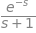

In [22]:
G4 = 1/(s+1)*exp(-s)
G4

Dibujamos el diagrama de Bode de la manera habitual:

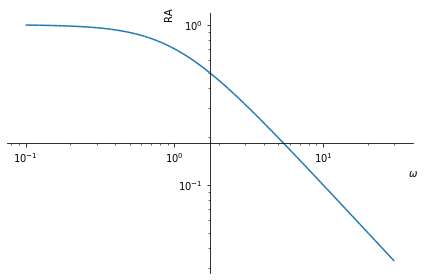

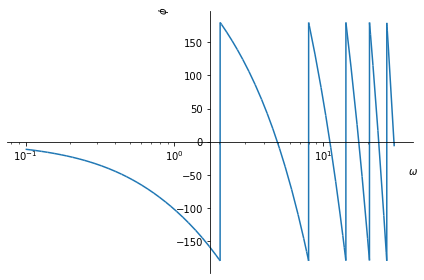

In [23]:
Gw4 = G4.subs(s, I*w)
RA4 = abs(Gw4)
phi4 = arg(Gw4)
wmin = 0.1
wmax = 30
plot(RA4, (w, wmin, wmax),
     xscale="log", yscale="log",
     ylabel="RA", xlabel="$\omega$")
plot(phi4*180/pi, (w, wmin, wmax),
     xscale="log",
     xlabel="$\omega$", ylabel="$\phi$")

Nos encontramos una situación como la del ejemplo anterior, pero en este caso tenemos muchas vueltas que contar. Repetimos el proceso anterior.

Empezamos creando la función para poderla tratar numéricamente:

In [24]:
fx = lambdify(w, phi4-pi*.9999)

A continuación encontramos los puntos en los que se completan las vueltas:

In [25]:
vueltas = roots(fx, wmin, wmax, 1e-4)
vueltas

Vamos a ver si cuenta las vueltas correctamente. Esto no es necesario, pero me hace gracia hacer este dibujo:

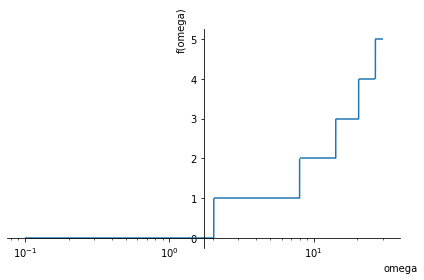

In [26]:
f = 0
for vuelta in vueltas:
    f = f + Heaviside(w - vuelta)
plot(f, (w, wmin, wmax), xscale="log")

Ya solo queda definir la nueva función del retraso teniendo en cuenta el contador de vueltas

In [27]:
phi4ajustado = phi4
for vuelta in vueltas:
    phi4ajustado = phi4ajustado - 2*pi*Heaviside(w-vuelta)

Ya solo nos queda representar correctamente el diagrama de Bode:

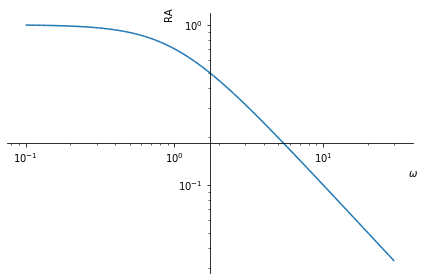

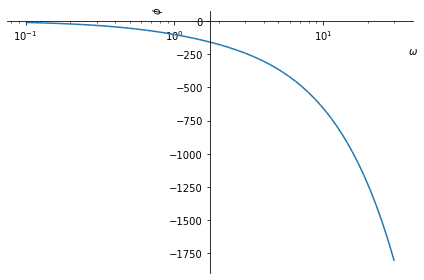

In [28]:
plot(RA4, (w, wmin, wmax),
     xscale="log", yscale="log", 
     ylabel="RA", xlabel="$\omega$")
plot(phi4ajustado*180/pi, (w, wmin, wmax),
     xscale="log",
     xlabel = "$\omega$", ylabel = "$\phi$")

Resulta interesante intentar dibujar este diagrama de Bode usando Wolfram Alpha. ¡No puede dibujarlo!

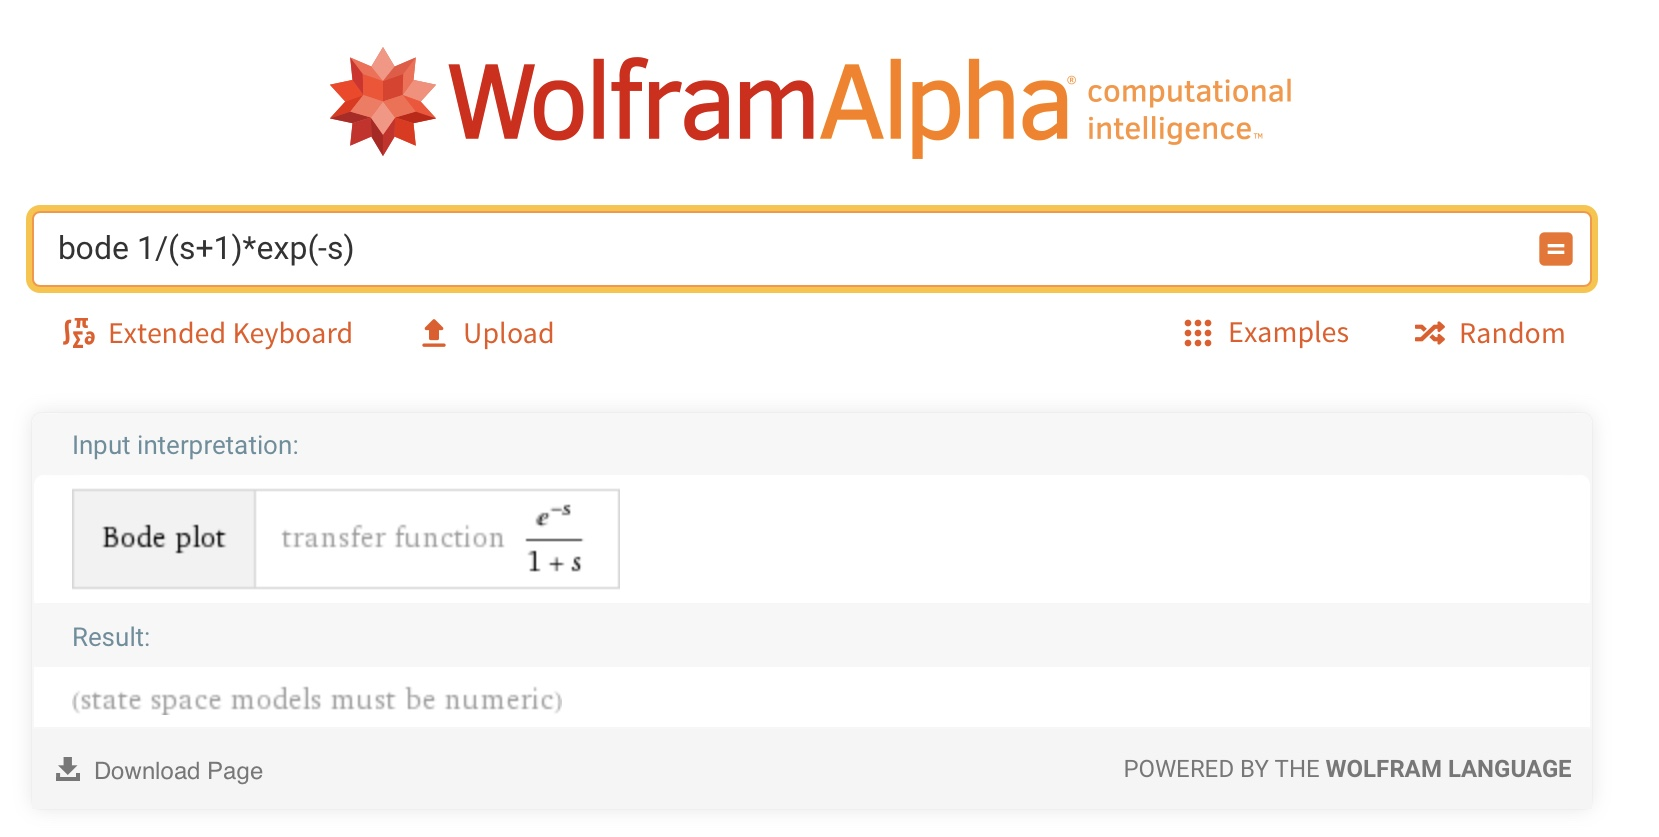

### Conclusiones

Hemos visto que podemos dibujar el diagrama de Bode de manera muy sencilla utilizando Sympy sin necesitar, prácticamente, conocimientos de Python o de programación.

El método es sencillo y potente. Incluso podemos dibujar situaciones con las que no puede Wolfram Alpha.

Se dejan como _ejercicios para el lector_ (o sea que me da pereza escribirlos y esto ya es suficientemente largo) estas tareas sencillas:

- Crear una función para no tener que escribir todas las instrucciones cada vez

- Dibujar el gráfico de razón de amplitudes usando decibelios

- Calcular valores útiles como son el margen de ganancia o el margen de fase